<a href="https://colab.research.google.com/github/Rioba-Ian/Deep_Learning/blob/main/Neural_Network_for_handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST multi-classification
We shall be building a neural network for multi-class classification using the popular MNIST

# Introduction

* About the data
* Loading the libraries
* Loading data
* EDA
* Data Preprocessing
* Model Building
1. Simple neural network without the hidden layer.
2. Building a model with a hidden layer.
* Summary

## About the data
MNIST refers to the modified national institute of standards and technology database, is a large database of 70,000 handwritten digits.
The train dataset contains 60,000 examples while the 10,000. The aim is to build a model that can recognize the image represented.

## Loading libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Basic EDA


In [3]:
print("There are", len(X_train), "images in the training dataset")

print("There are", len(X_test), "images in the test dataset")

There are 60000 images in the training dataset
There are 10000 images in the test dataset


The shape of one image

In [4]:
X_train[0].shape

(28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Let us try using the matplotlib inbuilt function for viewing these numbers

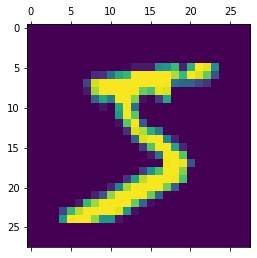

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

Our model is therefore working to be able to recognize a 28x28 matrix array representation

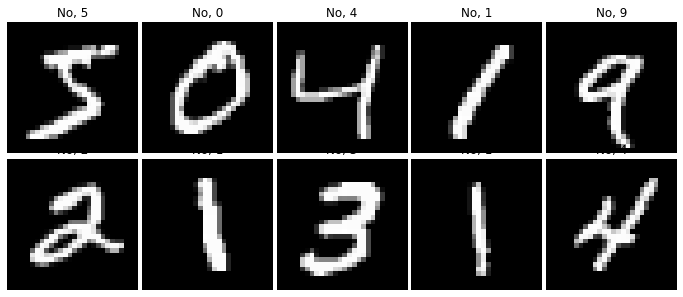

In [8]:
# viewing the images
num_rows, num_cols = 2,5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                    gridspec_kw={'wspace':0.03, 'hspace':0.01},
                    squeeze=True)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(X_train[image_index], cmap='gray')
        ax[r,c].set_title('No, %d' % y_train[image_index])
plt.show()
plt.close()

# Data preprocessing
We shall normalize our data. We shall reduce the pixel values to be between 0 and 1. The strong motivation to normalize would be to achieve consistency in the dynamic range for a set of data and reduce data redundancy. Normalizing helps improve model performance.

In [9]:
X_train = X_train/ 255
X_test = X_test/ 255
# The pixel values range from 0 to 255
# The range represents teh RGB scale value.

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flatten the data
we want to convert a dimensionality of 2 to a dimensionality of 1. 
> We shall understand the motivation behind this in a short while.

In [11]:
X_train.shape

(60000, 28, 28)

The data is a 3 dimensional. The first value is 60,000; number ofrecords of images in this situation. The second and third dimensioanlity represents the shape of each image 28 x 28.
<br>
Most of the supervised algorithms that execute classification and regression tasks, as well as some deep learning models built for the same purposes, are fed with 2-dimensionality data. We shall have to reduce ours from the 3D to 2D.

In [12]:
# convert the 2D array representing an image to one dimensional
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [14]:
X_train_flattened.shape

(60000, 784)

# Building models
## very simple neural network with no hidden layers
### Define the model

In [15]:
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])
# the input shape is 784.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Mostly in multi-classification problems, it is suggested we use the softmax. Sigmoid was the better between the two. 

## Compile the model

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


* **adam** is an optimization algorithms which is faster than the stochastic gradient descent. 
* **sparse_categorical_crossentropy** is a loss function similar to the **binary_classification**, theonly difference being that the target varible is binary in binary_classification. If your target varibales are normal integers and all, we use the sparse categorical crossentropy. 
* we shave used the **accuracy** metric. How correct we are in the model.


### Fit the model.

In [19]:
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2624 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2585 - accuracy: 0.9284
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2556 - accuracy: 0.9290
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2531 - accuracy: 0.9299
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2512 - accuracy: 0.9305
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2494 - accuracy: 0.9316
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2478 - accuracy: 0.9317
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2465 - accuracy: 0.9317
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2451 - accuracy: 0.9322
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.244

### Evaluate the model on unseen data

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 851us/step - loss: 0.2647 - accuracy: 0.9274


[0.26472318172454834, 0.9273999929428101]

The performance of the mdoel is 92.6%

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([8.8137388e-04, 2.4148861e-09, 4.1126013e-03, 9.7593904e-01,
       1.3646781e-03, 1.8406856e-01, 3.8882644e-09, 9.9987042e-01,
       7.2721153e-02, 7.0291442e-01], dtype=float32)

The above numbers represent probability values for different digits. The maximum probability will confirm what is the predicted digit for forst image in X_test.
<br> The value of the 0th index is the probability of the digit being 0.
<br> 
**Generalize** the value of the nth index above of number is saying the probability of the digit being n. 
<br>
**np.argmax** finds a maximum element from an array and returns the index of it. 

In [22]:
np.argmax(y_predicted[0])

7

let us try and see what this predicted index number really was.

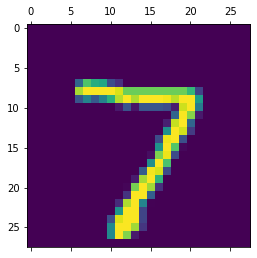

In [23]:
plt.matshow(X_test[0])

It is correct.

In [24]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, input_shape= (784, ), activation='relu'),
                             tf.keras.layers.Dense(100, input_shape= (100, ), activation='relu'),
                             tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit the model
model.fit(X_train_flattened, y_train, batch_size= 128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9836
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.9891
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9905
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9938
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9936
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0139 - accuracy: 0.9960
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0135 - accuracy: 0.9960
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0111 - accuracy: 0.9969
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.9972

In [27]:
# evaluate the model
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9762


[0.0945531502366066, 0.9761999845504761]

The accuracy of our model is 97.62%

# Saving and loading the model

In [28]:
# saving the model
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model.save(model_name)
model_path = save_dir + model_name
print('Saved trained model at %s ' % model_path)

Saved trained model at /results/keras_mnist.h5 


# Summary
* We have learned to normalize and flatten data
* We observed the performance of very simple neural network with no hidden layer and that of with one hidden layer with 100 neurons

# Reference
Neural Network for handwritten digits classification